# BECP: data filtering
### *by Jose Correa*

<a id='data-intro'></a>

# Introduction

This notebook initiates the transformation and structuring of data from its raw form into a preferred format, aiming to enhance data quality and usability for analytics or machine learning purposes. It encompasses tasks such as data loading, cleansing and merging of CSV files.

**Analysis steps**

We'll use Python in the Jupyter notebook, along with libraries like pandas and numpy for managing data, and matplotlib and seaborn for creating visuals. The main steps are as follows:
1. Analyze each CSV, convert them into dataframes, and merging them one at a time until all three CSV files are consolidated into one dataframe.
2. 
Examine the primary use of each building and assess the data distribution to determine the suitable optionsto continue in the capstone  analysis.

<a id='toc'></a>

# Table of Contents

[Introduction](#data-intro)\
[Data dictionary](#data-d)
1. [Basic Data Wrangling](#bdw-0)
    1. [Files merging](#bdw-1)
    2. [Subset](#bdw-2)

<a id='data-d'></a>

# Data dictionary

- `building_id`, foreign key for the building metadata.- `meter`, the  meter id code. Read as {0: electricity, 1: chilled water, 2: steam, 3: hot water}.  Not every building has all meter types.
- `meter_timestamp`, when the measurement was taken. Same as `weather_timestamp`.
- `meter_reading`, the target variable. Energy consumption in kWh (or equivalent).
- `site_id`, foreign key for the weather files.
- `primary_use`, indicator of the primary category of activities for the building.
- `square_feet`, gross floor area of the building in ft2.
- `year_built`, year building was opened.
- `floor_count`, number of floors of the building.
- `weather_timestamp`, when the measurement was taken. Same as `meter_timestamp`.
- `air_temperature`, degrees celsius.
- `cloud_coverage`, portion of the sky covered in clouds, in oktas.
- `dew_temperature`, degrees celsius.
- `precip_depth_1_hr`, millimeters.
- `sea_level_pressure`, millibar/hectopascals.
- `wind_direction`, compass direction (0-360).
- `wind_speed`, meters/second (m/s).


<a id='bdw-0'></a>

[back to TOC](#toc)

# 1. Basic Data Wrangling

We will start by importing the basic python packages and then start merging the CSV files.

In [1]:
# Import Python packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Setting figure size
plt.rcParams['figure.figsize']=(8.0,6.0)

<a id='bdw-1'></a>

## 1.1. Files merging
Merging CSV files into a single dataset offers numerous benefits. It consolidates diverse sources, providing a comprehensive pool of information for analysis. This unified dataset streamlines processing and analysis, fostering better insights into trends and correlations while improving overall data accuracy. Having all relevant data in one place simplifies decision-making, supporting more informed and comprehensive strategies.

The **files merge is DONE LOCALLY**, as the raw files are too large for uploading to GitHub. We'll begin by merging the 'train.csv' and 'building_metadata.csv'.

### 1.1.1. 'train' file analysis

This CSV file contains data associated with the time when a meter reading was recorded for a specific meter type within a given building We will start by loading it and familiarizing with its content. .

In [2]:
# Data loading, the CSV file is coma (,) separated. 
# The index is auto generated, since the 'building_id' column doesn't have unique values
train_df = pd.read_csv('data/train.csv', sep = ',')
display (train_df.head(3))

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0


In [3]:
# General info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB


### 1.1.2. 'building_meta' file analysis
This file contains information about the building's characteristics and its primary usage. We will analyze it to understand its data. 

In [4]:
# Data loading, the CSV file is coma (,) separated. 
# The index is auto generated, since the 'building_id' column doesn't have unique values
building_df = pd.read_csv('data/building_metadata.csv', sep = ',')
display (building_df.head(3))

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN


In [5]:
# General info
building_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int64  
 1   building_id  1449 non-null   int64  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int64  
 4   year_built   675 non-null    float64
 5   floor_count  355 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.1+ KB


### 1.1.3. Merging 'train_df' and 'building_df'
Now that the two CSV files are converted into dataframes, we'll perform a left merge to ensure retention of all the meter readings.

In [6]:
# Inner merge of the dataframes 'train_df' and 'building_df' on 'building_id'
train_building_df = train_df.merge(building_df, on='building_id', how='inner')
train_building_df.sample(3)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count
12927674,1055,0,2016-12-13 03:00:00,32.415,12,Education,86714,NaN,4.0
8605579,787,2,2016-10-12 22:00:00,1075.900,6,Lodging/residential,278795,NaN,NaN
17928382,1309,0,2016-10-06 22:00:00,65.880,14,Lodging/residential,58041,NaN,NaN


In [7]:
# Review merged dataframe
train_building_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
 4   site_id        int64  
 5   primary_use    object 
 6   square_feet    int64  
 7   year_built     float64
 8   floor_count    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.4+ GB


### 1.1.4. 'Weather_train' file analysis

This is the third and final CSV file to analyze, containing the weather data corresponding to each energy meter reading taken.

In [8]:
# Data loading, the CSV file is coma (,) separated. 
# The index is auto generated, since the 'site_id' column doesn't have unique values
weather_train_df = pd.read_csv('data/weather_train.csv', sep = ',')
weather_train_df.sample(3)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
137878,15,2016-10-12 19:00:00,20.6,0.0,9.4,NaN,NaN,160.0,6.7
106711,12,2016-03-12 13:00:00,13.2,7.0,5.1,NaN,1027.3,220.0,7.0
18217,2,2016-01-28 22:00:00,20.6,NaN,-7.2,0.0,1017.9,0.0,0.0


In [9]:
# General info
weather_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float64
 3   cloud_coverage      70600 non-null   float64
 4   dew_temperature     139660 non-null  float64
 5   precip_depth_1_hr   89484 non-null   float64
 6   sea_level_pressure  129155 non-null  float64
 7   wind_direction      133505 non-null  float64
 8   wind_speed          139469 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


### 1.1.5. Rename `timestamp` column header 
For clarity, let's rename the `timestamp` column for each dataframe.

In [10]:
# Rename the 'timestamp' column to 'meter_timestamp' to avoid ambiguity
train_building_df.rename(columns={'timestamp': 'meter_timestamp'}, inplace=True)

In [11]:
# Verify renaming
train_building_df.head(3)

,building_id,meter,meter_timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN
1,0,0,2016-01-01 01:00:00,0.0,0,Education,7432,2008.0,NaN
2,0,0,2016-01-01 02:00:00,0.0,0,Education,7432,2008.0,NaN


In [12]:
# For 'weather_train_df' rename the `timestamp` column to `weather_timestamp`
weather_train_df.rename(columns={'timestamp': 'weather_timestamp'}, inplace=True)

In [13]:
# Verify renaming
weather_train_df.head(3)

,site_id,weather_timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0


### 1.1.6 Merge 'train_building_df' with 'weather_train.df'
The final merge is also a left merge with the weather dataset, ensuring retention of all meter reading records.

In [14]:
# Merge the dataframe files on 'site_id' and 'meter_timestamp' equal to 'site_id' and 'weather_timestamp'. Left join to keep all 'train_building_df' records.
merged_train_df = train_building_df.merge(weather_train_df, left_on=['site_id', 'meter_timestamp'], right_on=['site_id', 'weather_timestamp'], how='left')

In [15]:
# Visualize new dataframe
merged_train_df.sample(3)

,building_id,meter,meter_timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,weather_timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
8207001,760,0,2016-12-30 08:00:00,143.1,6,Office,49990,NaN,NaN,2016-12-30 08:00:00,3.9,0.0,-8.3,0.0,1008.7,280.0,3.6
19300620,1387,0,2016-07-25 10:00:00,211.4,15,Office,187041,1973.0,NaN,2016-07-25 10:00:00,17.8,0.0,15.6,NaN,1013.5,80.0,2.6
18719686,1351,0,2016-07-02 06:00:00,14.5,15,Office,40611,NaN,NaN,2016-07-02 06:00:00,14.4,NaN,12.2,NaN,1014.5,300.0,4.1


In [16]:
# Overview of the new dataframe
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   building_id         int64  
 1   meter               int64  
 2   meter_timestamp     object 
 3   meter_reading       float64
 4   site_id             int64  
 5   primary_use         object 
 6   square_feet         int64  
 7   year_built          float64
 8   floor_count         float64
 9   weather_timestamp   object 
 10  air_temperature     float64
 11  cloud_coverage      float64
 12  dew_temperature     float64
 13  precip_depth_1_hr   float64
 14  sea_level_pressure  float64
 15  wind_direction      float64
 16  wind_speed          float64
dtypes: float64(10), int64(4), object(3)
memory usage: 2.6+ GB


In [17]:
# Shape
merged_train_df.shape

(20216100, 17)

[back to TOC](#toc)

<a id='bdw-2'></a>

## 1.2. Subset
In this section, we'll be selecting a subset of approximately ~400k rows. This reduced size will ease data manipulation and processing time on the PC.

In [23]:
# Main use buildings records count.
# Count by unique values
count_by_primary_use = merged_train_df.groupby(['primary_use'])['primary_use'].count()

# Sort descending
count_by_primary_use = count_by_primary_use.sort_values(ascending=True)
count_by_primary_use

primary_use
Religious worship                  32361
Utility                            56203
Technology/science                 77627
Services                           96519
Warehouse/storage                 111861
Retail                            112657
Food sales and service            114090
Manufacturing/industrial          125713
Parking                           213796
Other                             242222
Healthcare                        398527
Public services                  1662826
Lodging/residential              2146413
Entertainment/public assembly    2264917
Office                           4394864
Education                        8165504
Name: primary_use, dtype: int64

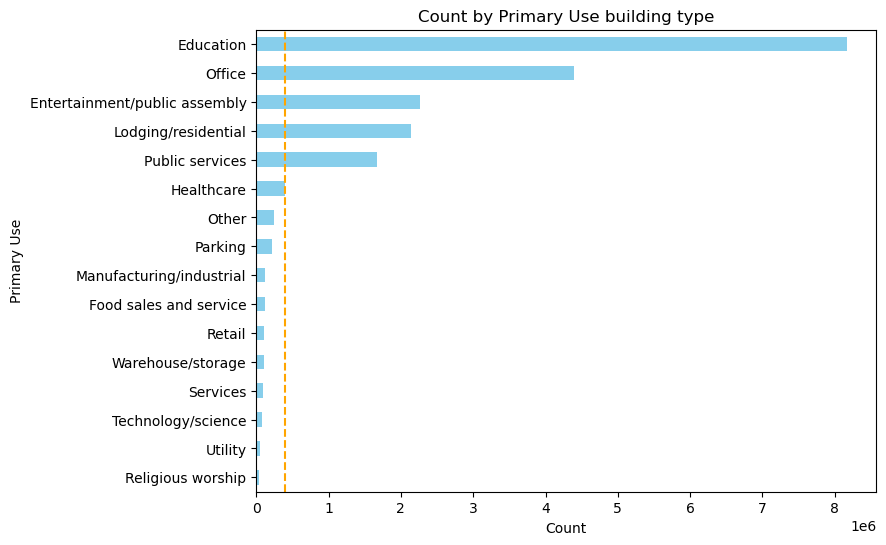

In [31]:
# Chart for 'primary_use'

# Create horizontal bar
plt.figure(figsize=(8,6))
count_by_primary_use.plot(kind='barh', color='skyblue')

plt.xlabel('Count')
plt.ylabel('Primary Use')
plt.title('Count by Primary Use building type')

# Adding a dotted vertical line at count = 400000
plt.axvline(x=400000, color='orange', linestyle='--')

plt.show()

***Insights***
- This chart shows healthcare as a strong candidate, however lets analyse other primary use buliding with similar size.

### 1.2.1. Data distribution for `meter_reading` for each building type

<Axes: xlabel='meter_reading', ylabel='Count'>

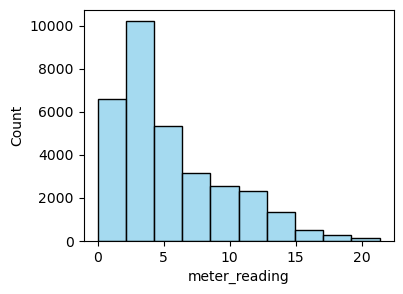

In [42]:
# Data distribution where 'primary_use' is 'Religious worship'
education_data = merged_train_df[merged_train_df['primary_use'] == 'Religious worship']
# Create histogram using Seaborn
plt.figure(figsize=(4,3))
sns.histplot(education_data['meter_reading'], bins=10, color='skyblue')

<Axes: xlabel='meter_reading', ylabel='Count'>

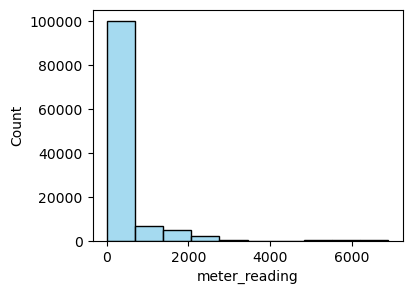

In [41]:
# Data distribution where 'primary_use' is 'Food sales and service'
education_data = merged_train_df[merged_train_df['primary_use'] == 'Food sales and service']
# Create histogram using Seaborn
plt.figure(figsize=(4,3))
sns.histplot(education_data['meter_reading'], bins=10, color='skyblue')

<Axes: xlabel='meter_reading', ylabel='Count'>

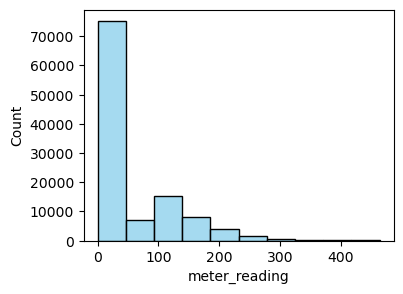

In [40]:
# Data distribution where 'primary_use' is 'Warehouse/storage'
education_data = merged_train_df[merged_train_df['primary_use'] == 'Warehouse/storage']
# Create histogram using Seaborn
plt.figure(figsize=(4,3))
sns.histplot(education_data['meter_reading'], bins=10, color='skyblue')

<Axes: xlabel='meter_reading', ylabel='Count'>

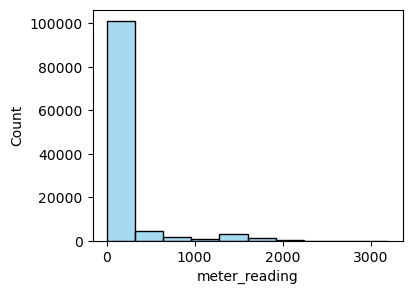

In [37]:
# Data distribution where 'primary_use' is 'Retail'
education_data = merged_train_df[merged_train_df['primary_use'] == 'Retail']
# Create histogram using Seaborn
plt.figure(figsize=(4,3))
sns.histplot(education_data['meter_reading'], bins=10, color='skyblue')

<Axes: xlabel='meter_reading', ylabel='Count'>

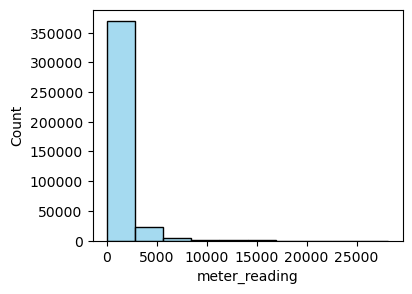

In [43]:
# Data distribution where 'primary_use' is 'Healthcare'
education_data = merged_train_df[merged_train_df['primary_use'] == 'Healthcare']
# Create histogram using Seaborn
plt.figure(figsize=(4,3))
sns.histplot(education_data['meter_reading'], bins=10, color='skyblue')

<Axes: xlabel='meter_reading', ylabel='Count'>

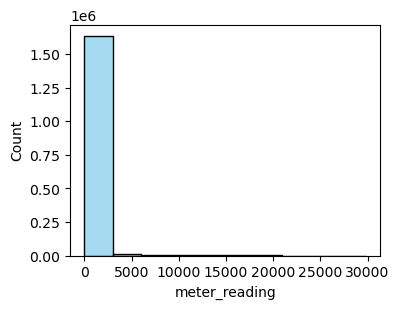

In [39]:
# Data distribution where 'primary_use' is 'Public services'
education_data = merged_train_df[merged_train_df['primary_use'] == 'Public services']
# Create histogram using Seaborn
plt.figure(figsize=(4,3))
sns.histplot(education_data['meter_reading'], bins=10, color='skyblue')

<Axes: xlabel='meter_reading', ylabel='Count'>

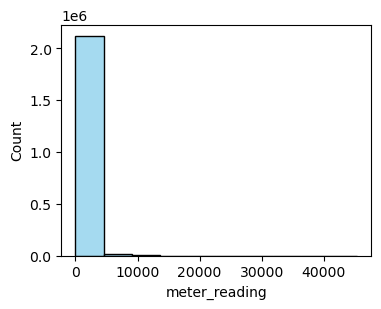

In [33]:
# Data distribution where 'primary_use' is 'Lodging/residential'
education_data = merged_train_df[merged_train_df['primary_use'] == 'Lodging/residential']
# Create histogram using Seaborn
plt.figure(figsize=(4,3))
sns.histplot(education_data['meter_reading'], bins=10, color='skyblue')

<Axes: xlabel='meter_reading', ylabel='Count'>

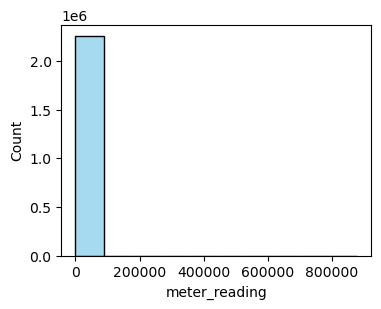

In [36]:
# Data distribution where 'primary_use' is 'Entertainment/public assembly'
education_data = merged_train_df[merged_train_df['primary_use'] == 'Entertainment/public assembly']
# Create histogram using Seaborn
plt.figure(figsize=(4,3))
sns.histplot(education_data['meter_reading'], bins=10, color='skyblue')

<Axes: xlabel='meter_reading', ylabel='Count'>

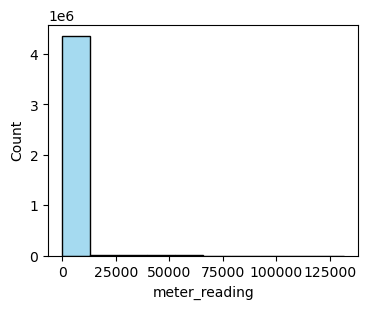

In [35]:
# Data distribution where 'primary_use' is 'Office'
education_data = merged_train_df[merged_train_df['primary_use'] == 'Office']
# Create histogram using Seaborn
plt.figure(figsize=(4,3))
sns.histplot(education_data['meter_reading'], bins=10, color='skyblue')

<Axes: xlabel='meter_reading', ylabel='Count'>

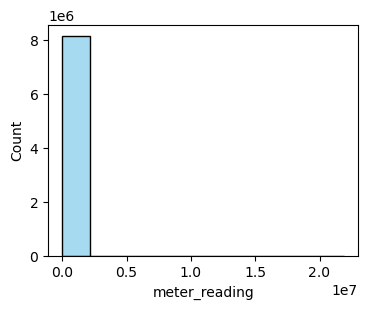

In [34]:
# Filter data where 'primary_use' is 'Education'
education_data = merged_train_df[merged_train_df['primary_use'] == 'Education']

# Create histogram using Seaborn
plt.figure(figsize=(4,3))
sns.histplot(education_data['meter_reading'], bins=10, color='skyblue')

***Insights***
- We will continue the analysis only with the Healthcare primary use, comprising of 397,992 rows.

In [36]:
# Filter the DataFrame to include only rows where 'primary_use' is 'Healthcare'
healthcare_train_df = merged_train_df[merged_train_df['primary_use'] == 'Healthcare']
healthcare_train_df

,building_id,meter,meter_timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,weather_timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
2600276,208,0,2016-01-01 00:00:00,77.2900,2,Healthcare,36904,1934.0,NaN,2016-01-01 00:00:00,15.6,6.0,-5.6,NaN,1015.3,270.0,3.6
2600277,208,1,2016-01-01 00:00:00,0.1055,2,Healthcare,36904,1934.0,NaN,2016-01-01 00:00:00,15.6,6.0,-5.6,NaN,1015.3,270.0,3.6
2600278,208,0,2016-01-01 01:00:00,87.0900,2,Healthcare,36904,1934.0,NaN,2016-01-01 01:00:00,13.9,NaN,-5.6,0.0,1015.6,270.0,4.1
2600279,208,1,2016-01-01 01:00:00,0.1407,2,Healthcare,36904,1934.0,NaN,2016-01-01 01:00:00,13.9,NaN,-5.6,0.0,1015.6,270.0,4.1
2600280,208,0,2016-01-01 02:00:00,90.5100,2,Healthcare,36904,1934.0,NaN,2016-01-01 02:00:00,13.3,2.0,-5.6,0.0,1016.0,270.0,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19315319,1388,1,2016-12-31 19:00:00,32.8303,15,Healthcare,45465,1990.0,NaN,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
19315320,1388,1,2016-12-31 20:00:00,28.9841,15,Healthcare,45465,1990.0,NaN,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
19315321,1388,1,2016-12-31 21:00:00,25.0044,15,Healthcare,45465,1990.0,NaN,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
19315322,1388,1,2016-12-31 22:00:00,22.3746,15,Healthcare,45465,1990.0,NaN,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6


In [37]:
# Export dataframe to a csv file
healthcare_train_df.to_csv('data/01_healthcare_train_df.csv', index=False)

[back to TOC](#toc)

<a id='hea-0'></a>

With the final data subset ready, the next notebook (02_EDA_stats), will delve into exploratory data analysis (EDA) and statistical analysis.